In [16]:
import numpy as np
from scipy.optimize import minimize
from scipy.io import loadmat
from numpy.linalg import det, inv
from math import sqrt, pi
import scipy.io
import matplotlib.pyplot as plt
import pickle
import sys

# Experiment with Gaussian Discriminators
Implemented Linear Discriminant Analysis (LDA) and Quadratic Discriminant Analysis (QDA) on a training data set (a feature matrix and labels) and returned the means and covariance matrix (or matrices). Also Implemented two functions ldaTest and qdaTest which returns the true labels for a given test data set and the accuracy using the true labels for the test data. Trained both methods using the sample training data (sample train). Reported the accuracy of LDA and QDA on the provided test data set (sample test). Also, plotted the discriminating boundary for linear and quadratic discriminators.

In [17]:
def ldaLearn(X,y):
    # Inputs
    # X - a N x d matrix with each row corresponding to a training example
    # y - a N x 1 column vector indicating the labels for each training example
    #
    # Outputs
    # means - A d x k matrix containing learnt means for each of the k classes
    # covmat - A single d x d learnt covariance matrix
    
    means = []
    classes = np.unique(y)
    for g in classes:
        Xg = X[y.flatten() == g, :]
        
        means.append(Xg.mean(axis = 0))
    means=np.transpose(np.asarray(means))
    covmat = np.cov(X.transpose())
    
    # IMPLEMENT THIS METHOD 
    return means,covmat

def qdaLearn(X,y):
    # Inputs
    # X - a N x d matrix with each row corresponding to a training example
    # y - a N x 1 column vector indicating the labels for each training example
    #
    # Outputs
    # means - A d x k matrix containing learnt means for each of the k classes
    # covmats - A list of k d x d learnt covariance matrices for each of the k classes
    means = []
    covmats = []
    classes = np.unique(y)
    for g in classes:
        Xg = X[y.flatten() == g, :]
        means.append(Xg.mean(0))
        covmats.append(np.cov(Xg.transpose()))       
    means = np.transpose(np.asarray(means))
        
    # IMPLEMENT THIS METHOD
    return means,covmats

def ldaTest(means,covmat,Xtest,ytest):
    # Inputs
    # means, covmat - parameters of the LDA model
    # Xtest - a N x d matrix with each row corresponding to a test example
    # ytest - a N x 1 column vector indicating the labels for each test example
    # Outputs
    # acc - A scalar accuracy value
    # ypred - N x 1 column vector indicating the predicted labels
    
    invcovmat = np.linalg.inv(covmat)
    detcovmat = np.linalg.det(covmat)
    
    denominator = np.sqrt(2*np.pi) *np.square((np.power(detcovmat,2)));
    
    classes = means.shape[1]
    total = np.zeros((Xtest.shape[0],classes))
    
    for i in range(classes):
        #Run it k times
        total[:,i] = np.exp(-0.5*np.sum((Xtest - means[:,i])*np.dot(invcovmat,(Xtest - means[:,i]).T).T, axis = 1))/denominator
    
    ypred = np.argmax(total,1)+1
    acc = 100*np.mean(ypred == ytest.reshape(ytest.size))     

    # IMPLEMENT THIS METHOD
    return acc,ypred


def qdaTest(means,covmats,Xtest,ytest):
    # Inputs
    # means, covmats - parameters of the QDA model
    # Xtest - a N x d matrix with each row corresponding to a test example
    # ytest - a N x 1 column vector indicating the labels for each test example
    # Outputs
    # acc - A scalar accuracy value
    # ypred - N x 1 column vector indicating the predicted labels
    
    classes = means.shape[1]
    total = np.zeros((Xtest.shape[0],classes))
    for i in range(means.shape[1]):
        invcovmat = np.linalg.inv(covmats[i])
        covmatdet = np.linalg.det(covmats[i])
        
        denominator = np.sqrt(2*np.pi)*np.square(np.power(covmatdet,2))
        
        total[:,i] = np.exp(-0.5*np.sum((Xtest - means[:,i])* np.dot(invcovmat, (Xtest - means[:,i]).T).T,1))/denominator
    
    ypred = np.argmax(total,1)+1
    
    acc = 100*np.mean(ypred == ytest.reshape(ytest.size))

    # IMPLEMENT THIS METHOD
    return acc,ypred


LDA Accuracy = 97.0
QDA Accuracy = 97.0


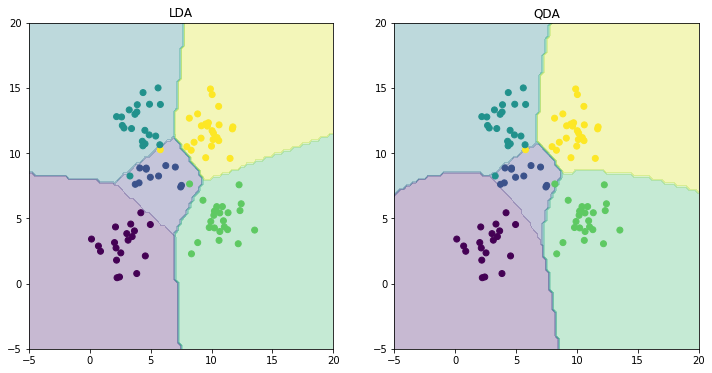

In [18]:
# load the sample data                                                                 
if sys.version_info.major == 2:
    X,y,Xtest,ytest = pickle.load(open('sample.pickle','rb'))
else:
    X,y,Xtest,ytest = pickle.load(open('sample.pickle','rb'),encoding = 'latin1')

# LDA
means,covmat = ldaLearn(X,y)
ldaacc,ldares = ldaTest(means,covmat,Xtest,ytest)
print('LDA Accuracy = '+str(ldaacc))
# QDA
means,covmats = qdaLearn(X,y)
qdaacc,qdares = qdaTest(means,covmats,Xtest,ytest)
print('QDA Accuracy = '+str(qdaacc))

# plotting boundaries
x1 = np.linspace(-5,20,100)
x2 = np.linspace(-5,20,100)
xx1,xx2 = np.meshgrid(x1,x2)
xx = np.zeros((x1.shape[0]*x2.shape[0],2))
xx[:,0] = xx1.ravel()
xx[:,1] = xx2.ravel()

fig = plt.figure(figsize=[12,6])
plt.subplot(1, 2, 1)

zacc,zldares = ldaTest(means,covmat,xx,np.zeros((xx.shape[0],1)))
plt.contourf(x1,x2,zldares.reshape((x1.shape[0],x2.shape[0])),alpha=0.3)
plt.scatter(Xtest[:,0],Xtest[:,1],c=ytest[:,0])
plt.title('LDA')

plt.subplot(1, 2, 2)

zacc,zqdares = qdaTest(means,covmats,xx,np.zeros((xx.shape[0],1)))
plt.contourf(x1,x2,zqdares.reshape((x1.shape[0],x2.shape[0])),alpha=0.3)
plt.scatter(Xtest[:,0],Xtest[:,1],c=ytest[:,0])
plt.title('QDA')

plt.show()

# Experiment with Linear Regression
Calculated and reported the MSE for training and test data for two cases: first, without using an intercept (or
bias) term, and second with using an intercept.

In [19]:
def learnOLERegression(X,y):
    # Inputs:                                                         
    # X = N x d 
    # y = N x 1                                                               
    # Output: 
    # w = d x 1 
    X_transpose = np.transpose(X)
    prod1 = np.dot(X_transpose,X)
    prod2 = np.dot(X_transpose,y)
    w1 = np.linalg.inv(prod1)
    w = np.dot(w1,prod2)
    # IMPLEMENT THIS METHOD                                                   
    return w

In [20]:
def learnRidgeRegression(X,y,lambd):
    # Inputs:
    # X = N x d                                                               
    # y = N x 1 
    # lambd = ridge parameter (scalar)
    # Output:                                                                  
    # w = d x 1 
    
    w = np.dot(np.dot(scipy.linalg.inv(lambd*np.eye(X.shape[1]) + np.dot(np.transpose(X),X)),np.transpose(X)),y)

    # IMPLEMENT THIS METHOD                                                   
    return w

In [21]:
def testOLERegression(w,Xtest,ytest):
    # Inputs:
    # w = d x 1
    # Xtest = N x d
    # ytest = X x 1
    # Output:
    # mse
    N = Xtest.shape[0]
    error = np.subtract(ytest, np.dot(Xtest, w));
    mse = np.sum(np.square(error))/N
    # IMPLEMENT THIS METHOD
    return mse

In [22]:
def regressionObjVal(w, X, y, lambd):
    # compute squared error (scalar) and gradient of squared error with respect
    # to w (vector) for the given data X and y and the regularization parameter
    # lambda                                                                  
    
    # IMPLEMENT THIS METHOD  
    w1 = np.asmatrix(w)
    w1 = w1.transpose()
    inter = y - np.dot(X_i,w1)

    error = 0.5*(np.dot(inter.transpose(),inter) + lambd*np.dot(w1.transpose(),w1))
    error_grad = -(np.dot(X_i.transpose(),inter)) + lambd*w1
    error_grad = np.squeeze(np.array(error_grad))
    return error, error_grad

In [23]:
def mapNonLinear(x,p):
    # Inputs:                                                                   
    # x - a single column vector (N x 1)                                        
    # p - integer (>= 0)                                                        
    # Outputs:                                                                  
    # Xd - (N x (d+1))                                                         

    # IMPLEMENT THIS METHOD
    Xd = np.zeros((x.shape[0],p+1))
    for i in range(p+1):
        Xd[:,i] = pow(x,i)
    return Xd

In [24]:
# Problem 2
if sys.version_info.major == 2:
    X,y,Xtest,ytest = pickle.load(open('diabetes.pickle','rb'))
else:
    X,y,Xtest,ytest = pickle.load(open('diabetes.pickle','rb'),encoding = 'latin1')

# add intercept
X_i = np.concatenate((np.ones((X.shape[0],1)), X), axis=1)
Xtest_i = np.concatenate((np.ones((Xtest.shape[0],1)), Xtest), axis=1)

w = learnOLERegression(X,y)
mle = testOLERegression(w,Xtest,ytest)
mle_train = testOLERegression(w,X,y)

w_i = learnOLERegression(X_i,y)
mle_i = testOLERegression(w_i,Xtest_i,ytest)
mle_itrain = testOLERegression(w_i,X_i,y)

print('MSE without intercept '+str(mle))
print('MSE with intercept '+str(mle_i))
print('MSE without intercept on training data '+str(mle_train))
print('MSE with intercept on training data '+str(mle_itrain))

MSE without intercept 106775.36155260474
MSE with intercept 3707.8401812047628
MSE without intercept on training data 19099.446844570608
MSE with intercept on training data 2187.160294930389


# Experiment with Ridge Regression
Implemented parameter estimation for ridge regression by minimizing the regularized squared loss in the function learnRidgeRegression.
Calculated and reported the MSE for training and test data using ridge regression parameters using the the testOLERegression function that you implemented in Experiment with Linear Regression.
Used data with intercept. Plotted the errors on train and test data for different values of λ. Vary λ from 0 (no regularization) to 1 in steps of 0.01.
Compared the relative magnitudes of weights learnt using OLE  and weights learnt using ridge regression.
Compared the two approaches in terms of errors on train and test data

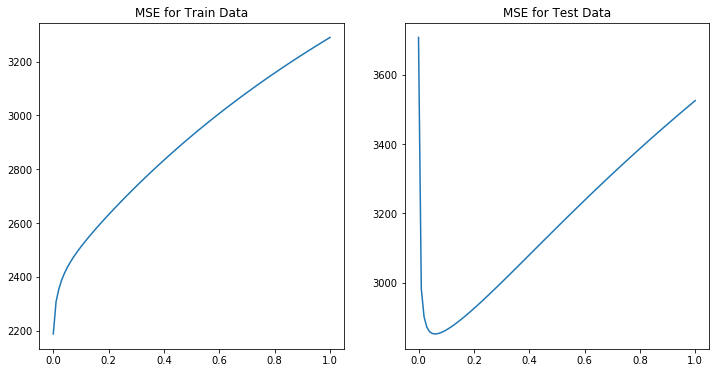

In [25]:
#Ridge regression
k = 101
lambdas = np.linspace(0, 1, num=k)
i = 0
mses3_train = np.zeros((k,1))
mses3 = np.zeros((k,1))
for lambd in lambdas:
    w_l = learnRidgeRegression(X_i,y,lambd)
    mses3_train[i] = testOLERegression(w_l,X_i,y)
    mses3[i] = testOLERegression(w_l,Xtest_i,ytest)
    i = i + 1
fig = plt.figure(figsize=[12,6])
plt.subplot(1, 2, 1)
plt.plot(lambdas,mses3_train)
plt.title('MSE for Train Data')
plt.subplot(1, 2, 2)
plt.plot(lambdas,mses3)
plt.title('MSE for Test Data')

plt.show()

# Used Gradient Descent for Ridge Regression Learning
Used the minimize function (from the scipy library).Implemented a function regressionObjVal to compute the regularized squared error and its gradient with respect to w.
Plotted the errors on train and test data obtained by using the gradient descent based learning by varying the regularization parameter λ. Compared with the results obtained in Ridge Regression experiment.


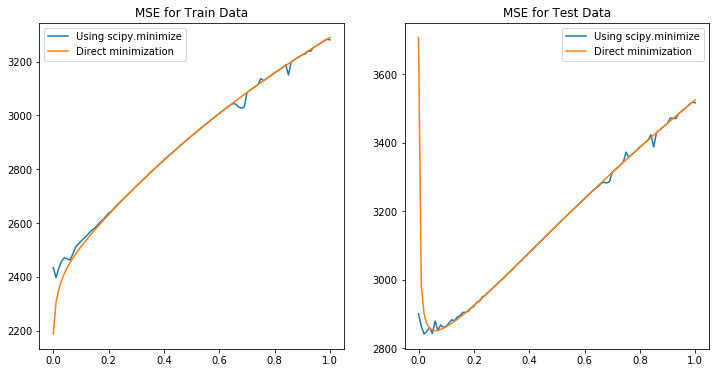

In [26]:

k = 101
lambdas = np.linspace(0, 1, num=k)
i = 0
mses4_train = np.zeros((k,1))
mses4 = np.zeros((k,1))
opts = {'maxiter' : 20}    # Preferred value.                                                
w_init = np.ones((X_i.shape[1],1))
for lambd in lambdas:
    args = (X_i, y, lambd)
    w_l = minimize(regressionObjVal, w_init, jac=True, args=args,method='CG', options=opts)
    w_l = np.transpose(np.array(w_l.x))
    w_l = np.reshape(w_l,[len(w_l),1])
    mses4_train[i] = testOLERegression(w_l,X_i,y)
    mses4[i] = testOLERegression(w_l,Xtest_i,ytest)
    i = i + 1
fig = plt.figure(figsize=[12,6])
plt.subplot(1, 2, 1)
plt.plot(lambdas,mses4_train)
plt.plot(lambdas,mses3_train)
plt.title('MSE for Train Data')
plt.legend(['Using scipy.minimize','Direct minimization'])

plt.subplot(1, 2, 2)
plt.plot(lambdas,mses4)
plt.plot(lambdas,mses3)
plt.title('MSE for Test Data')
plt.legend(['Using scipy.minimize','Direct minimization'])
plt.show()

# Non-linear Regression
Investigated the impact of using higher order polynomials for the input features. For this problem used the third variable as the only input variable:
xtrain=xtrain[:,2] x test = x test[:,2]
Implemented the function mapNonLinear which converts a single attribute x into a vector of p attributes, 1,x,x2,...,xp.
Using the λ = 0 and the optimal value of λ found in Ridge regression, trained ridge regression weights using the non-linear mapping of the data. Varied p from 0 to 6. Note that p = 0 means using a horizontal line as the regression line, p = 1 is the same as linear ridge regression.
Computed the errors on train and test data.
Compared the results for both values of λ.

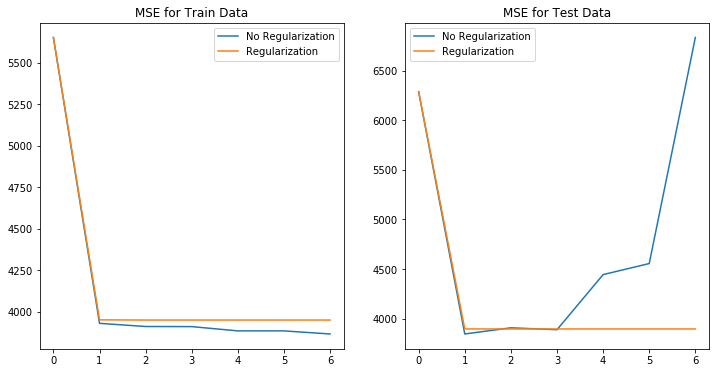

In [27]:
pmax = 7
#lambda_opt = 0 # REPLACE THIS WITH lambda_opt estimated from Problem 3
lambda_opt = lambdas[np.argmin(mses3)]
mses5_train = np.zeros((pmax,2))
mses5 = np.zeros((pmax,2))
for p in range(pmax):
    Xd = mapNonLinear(X[:,2],p)
    Xdtest = mapNonLinear(Xtest[:,2],p)
    w_d1 = learnRidgeRegression(Xd,y,0)
    mses5_train[p,0] = testOLERegression(w_d1,Xd,y)
    mses5[p,0] = testOLERegression(w_d1,Xdtest,ytest)
    w_d2 = learnRidgeRegression(Xd,y,lambda_opt)
    mses5_train[p,1] = testOLERegression(w_d2,Xd,y)
    mses5[p,1] = testOLERegression(w_d2,Xdtest,ytest)

fig = plt.figure(figsize=[12,6])
plt.subplot(1, 2, 1)
plt.plot(range(pmax),mses5_train)
plt.title('MSE for Train Data')
plt.legend(('No Regularization','Regularization'))
plt.subplot(1, 2, 2)
plt.plot(range(pmax),mses5)
plt.title('MSE for Test Data')
plt.legend(('No Regularization','Regularization'))
plt.show()
